<a href="https://colab.research.google.com/github/jsbd10/PredictionPneumothorax-/blob/main/ProgramaTesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libreria
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

In [ ]:
IMAGE_SIZE = [224,224]
train_path = './drive/MyDrive/FinalDataset/Train'
valid_path = './drive/MyDrive/FinalDataset/Test'

In [ ]:
vgg = VGG16(input_shape= IMAGE_SIZE + [3], weights= 'imagenet' , include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('./drive/MyDrive/FinalDataset/Train/*')
print(folders)
x = Flatten()(vgg.output)

['./drive/MyDrive/FinalDataset/Train/PNEUMOTHORAX', './drive/MyDrive/FinalDataset/Train/NORMAL']


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                    horizontal_flip =True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('./drive/MyDrive/FinalDataset/Train',  
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('./drive/MyDrive/FinalDataset/Test',  
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7181 images belonging to 2 classes.
Found 1611 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
225/225 [==============================] - 5766s 25s/step - loss: 0.0298 - accuracy: 0.9914 - val_loss: 0.0209 - val_accuracy: 0.9944
Epoch 2/5
225/225 [==============================] - 165s 733ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0279 - val_accuracy: 0.9919
Epoch 3/5
225/225 [==============================] - 165s 733ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0461 - val_accuracy: 0.9894
Epoch 4/5
225/225 [==============================] - 165s 732ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0744 - val_accuracy: 0.9851
Epoch 5/5
225/225 [==============================] - 165s 732ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0665 - val_accuracy: 0.9863


In [ ]:
model.save('./drive/MyDrive/FinalDataset/model/model_vgg16.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


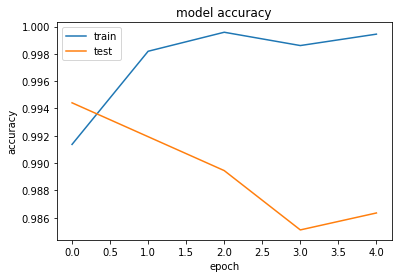

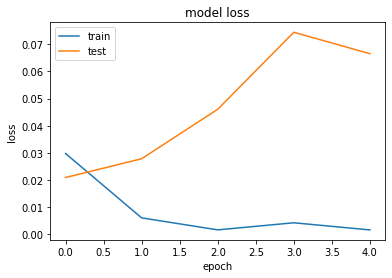

In [ ]:
# list all data in history
print(r.history.keys())
# summarize history for accuracy
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import os
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

model=load_model('.//drive/MyDrive/FinalDataset/model/modelNeumotorax.h5')
#img = image.load_img('https://pneumotoraximages.blob.core.windows.net/uploaded-images/1.2.276.0.7230010.3.1.4.8323329.301.1517875162.280319.png' , target_size=(224,224))
img = image.load_img('./drive/MyDrive/FinalDataset/Validacion/NORMAL/Normal7.jpg' , target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

result=int(classes[0][0])
resultado=classes[0]

print(result)
if result==0:
    print("Neumotorax")
else:
    print("Normal")



1
Normal
